<div style="text-align: center; background-color: black; color: white; height: 70px; font-size: 25px; font-family: times new roman"><br>Spam and Ham Email Detection</div><br>
<div style="text-align: center;">
    <img src="1.png">
</div>

<p style="color: red; font-weight: bold;">Project Summary: Spam and Ham Email Detection</p>
  <ol>
    <li><b>Goal:</b> Classify messages as spam or ham using machine learning. 🙋</li>
    <li><b>Dataset:</b> Contains 5,572 labeled messages (ham or spam). 🔍</p> 
    <p style = "color: red"><b>Steps to be performed:</b></li>
    <li>Data Cleaning 🧹</li>
    <li>EDA 📊</li>
    <li>Text Preprocessing ✍️</li>
    <li>Text vectorization using TF-IDF 🐱‍🏍</li>
    <li>Model Training 🤖</li>
    <li>Evaluation 📈</li>
    <li>Conclusion 🎉</li>   
  </ol>

<div style="text-align: center; background-color: black; color: white; height: 70px; font-size: 25px; font-family: times new roman"><br>Spam and Ham Email Detection</div><br>
<div style="text-align: center;">
    <img src="2.gif">
</div>

<div style="text-align: center; background:  navy; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Import Necessary Libraries</div>


In [1]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DANIYAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DANIYAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Data Loading</b></span>

In [2]:
df = pd.read_csv('Spam_Emails.csv', encoding='latin1')
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ???_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<div style="text-align: center; background:  navy; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Data Cleaning</div>

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Data Info</b></span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Rename column </b></span>

In [4]:
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ???_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Convert the Label Encoder </b></span>

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [6]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ???_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Check Missing Values </b></span>

In [7]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Check Duplicate Values </b></span>

In [8]:
df.duplicated().sum()

403

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Drop Duplicate Values </b></span>

In [9]:
df = df.drop_duplicates(keep = 'first')
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ???_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df.shape

(5169, 2)

<div style="text-align: center; background:  navy; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Exploratory Data Analysis (EDA)</div>

In [11]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Percentage of Spam and Ham Emails </b></span>

In [12]:
values = df['Target'].value_counts()
total = values.sum()

percentage_0 = (values[0] / total) * 100
percentage_1 = (values[1] / total) * 100

print(f"Percentage of 0 = {percentage_0:.2f}")
print(f"Percentage of 1 = {percentage_1:.2f}")

Percentage of 0 = 87.37
Percentage of 1 = 12.63


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Pie chart to show distribution of Spam and Ham Emails </b></span>

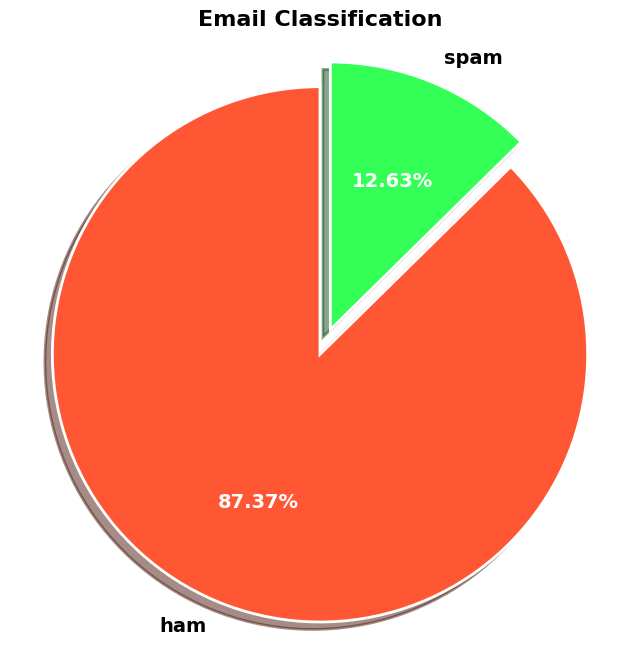

In [13]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold', color='black')
    autotext.set(size=14, weight='bold', color='white')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Text Length </b></span>

In [14]:
print("Index\tChracters")
print("---------------------")

df['num_characters'] = df['Text'].apply(len)
print(df['num_characters'])

Index	Chracters
---------------------
0       111
1        29
2       155
3        49
4        61
       ... 
5567    167
5568     40
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64


C:\Users\DANIYAL\AppData\Local\Temp\ipykernel_8744\37102349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [15]:
print("Index\tWords")
print("---------------------")

df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
print(df['num_words'])

Index	Words
---------------------
0       24
1        8
2       37
3       13
4       15
        ..
5567    42
5568    13
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64


C:\Users\DANIYAL\AppData\Local\Temp\ipykernel_8744\2824458382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [16]:
print("Index\tSentence")
print("---------------------")

df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
print(df['num_sentence'])

Index	Sentence
---------------------
0       2
1       2
2       2
3       1
4       1
       ..
5567    5
5568    2
5569    2
5570    1
5571    2
Name: num_sentence, Length: 5169, dtype: int64


C:\Users\DANIYAL\AppData\Local\Temp\ipykernel_8744\2029003952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [17]:
df[['num_characters', 'num_words', 'num_sentence']]

,num_characters,num_words,num_sentence
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,167,42,5
5568,40,13,2
5569,57,15,2
5570,125,27,1


In [18]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,79.604759,19.236990,2.055717
std,58.701318,14.026103,1.450149
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,118.000000,27.000000,3.000000
max,910.000000,220.000000,28.000000


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Summary statistics for Ham Emails </b></span>

In [19]:
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.809345,17.581045,1.867582
std,56.494794,13.856433,1.317470
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,23.000000,2.000000
max,910.000000,220.000000,28.000000


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Summary statistics for Spam Emails </b></span>

In [20]:
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,140.431853,30.689127,3.356815
std,31.142858,8.913343,1.645715
min,13.000000,2.000000,1.000000
25%,133.000000,27.000000,2.000000
50%,151.000000,31.000000,3.000000
75%,160.000000,37.000000,4.000000
max,230.000000,58.000000,10.000000


In [21]:
pip install --upgrade matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


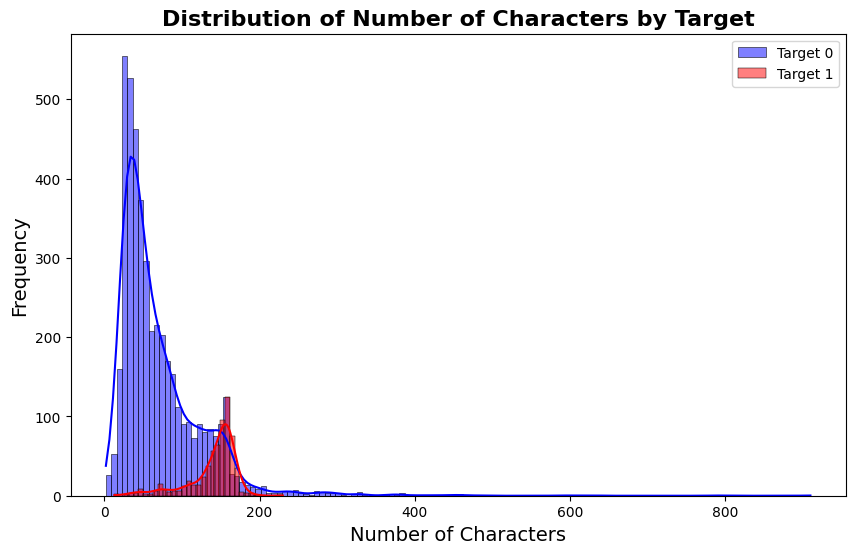

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['Target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

plt.show()

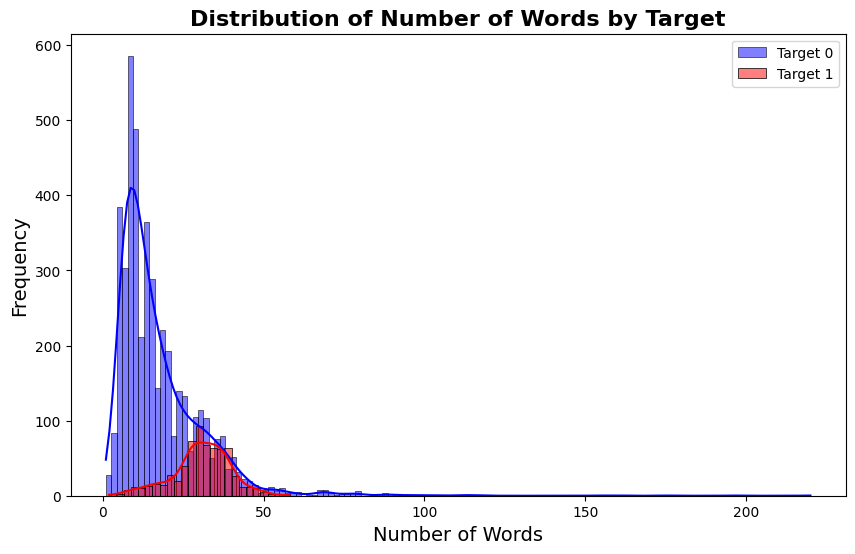

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['Target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['Target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

plt.show()

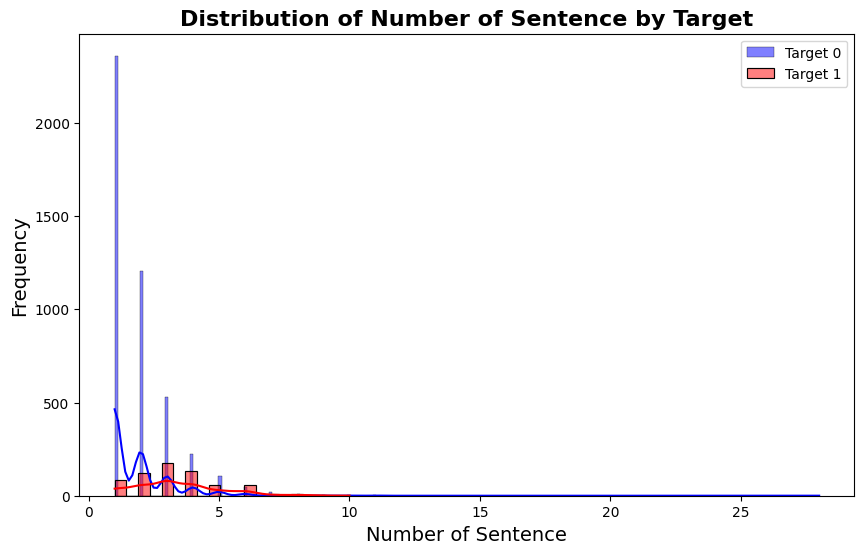

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['Target'] == 0]['num_sentence'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['Target'] == 1]['num_sentence'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Sentence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Sentence by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Correlation </b></span>

In [25]:
df[['Target','num_characters', 'num_words', 'num_sentence']].corr()

,Target,num_characters,num_words,num_sentence
Target,1.000000,0.394068,0.310507,0.341208
num_characters,0.394068,1.000000,0.960065,0.648822
num_words,0.310507,0.960065,1.000000,0.714146
num_sentence,0.341208,0.648822,0.714146,1.000000


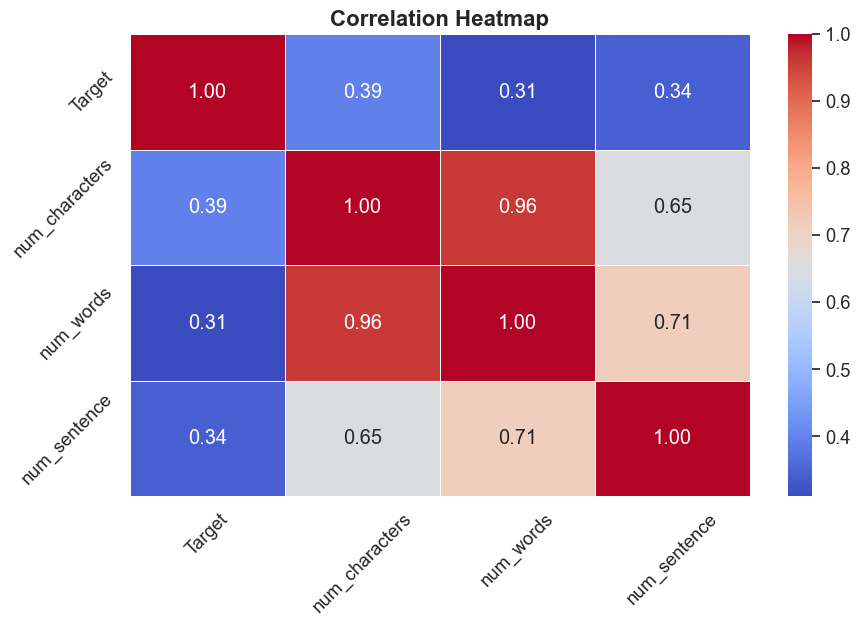

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['Target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)


# Show the heatmap
plt.show()


<div style="text-align: center; background:  navy; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Data Preprocessing</div>

In [27]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)


In [28]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Creating a new column: Transformed_Text </b></span>

In [29]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

C:\Users\DANIYAL\AppData\Local\Temp\ipykernel_8744\833893575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_Text'] = df['Text'].apply(transform_text)


In [30]:
df

,Target,Text,num_characters,num_words,num_sentence,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,167,42,5,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ???_ b going to esplanade fr home?,40,13,2,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Word Cloud of Spam messages of Transformed_Text </b></span>

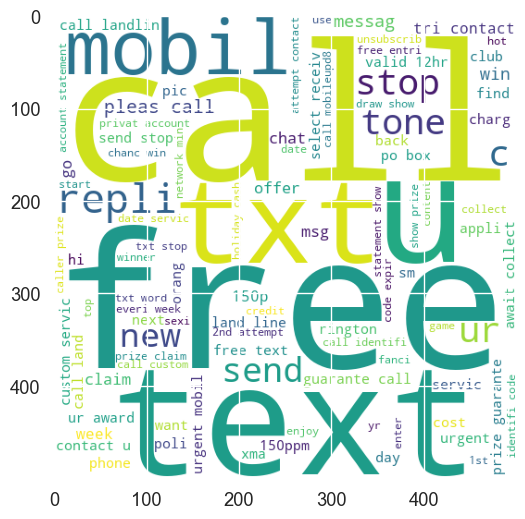

In [36]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Word Cloud of Ham messages of Transformed_Text </b></span>

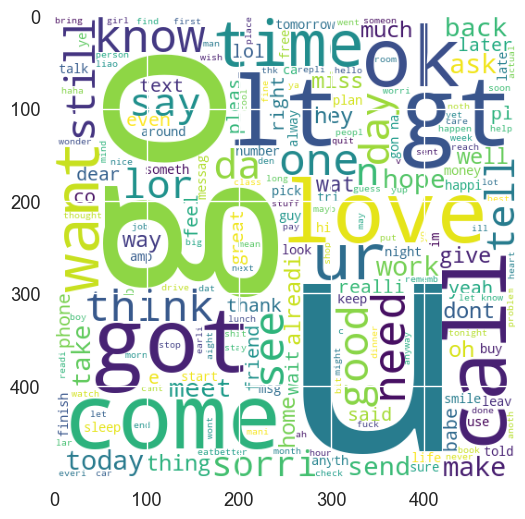

In [37]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['Target'] == 0]['Transformed_Text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Find Top 30 words of Spam </b></span>

In [40]:
spam_carpos = []
for sentence in df[df['Target'] == 1]['Transformed_Text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [42]:
from collections import Counter
filter_spam_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
filter_spam_df

,0,1
0,call,325
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Bar chart of Spam words </b></span>

C:\Users\DANIYAL\AppData\Local\Temp\ipykernel_8744\1023977471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_spam_df, x = filter_spam_df[1], y = filter_spam_df[0], palette = 'bright')


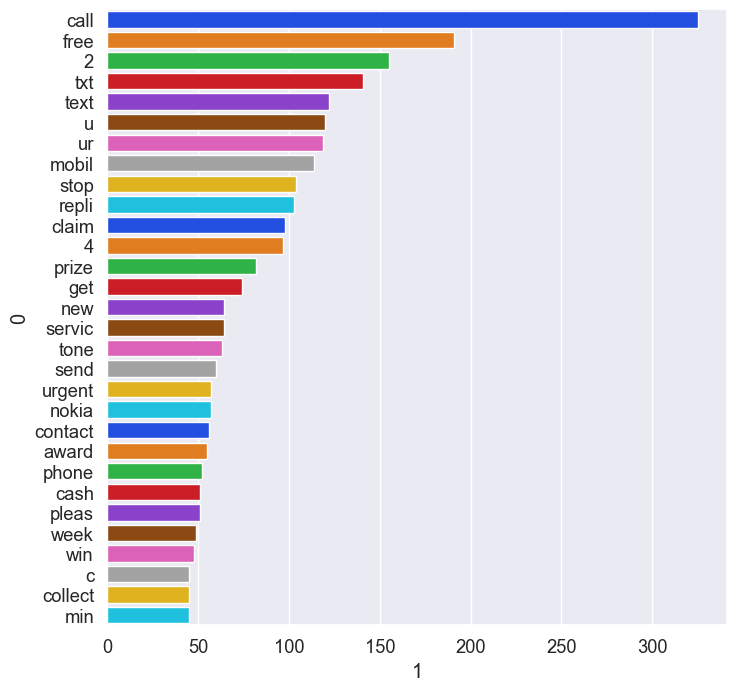

In [56]:
plt.figure(figsize=(8, 8))
sns.barplot(data = filter_spam_df, x = filter_spam_df[1], y = filter_spam_df[0], palette = 'bright')
plt.xticks(rotation = 0)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Find Top 30 words of Ham </b></span>

In [45]:
ham_carpos = []
for sentence in df[df['Target'] == 1]['Transformed_Text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [46]:
from collections import Counter
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
filter_ham_df

,0,1
0,call,325
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Bar chart of Ham words </b></span>

C:\Users\DANIYAL\AppData\Local\Temp\ipykernel_8744\2970994843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[1], y = filter_ham_df[0], palette = 'cool')


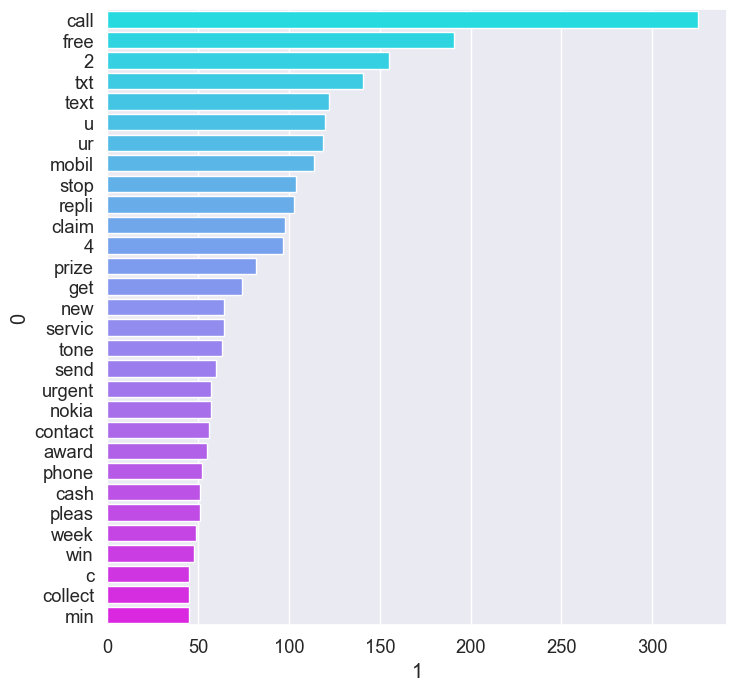

In [52]:
plt.figure(figsize=(8, 8))
sns.barplot(data = filter_ham_df, x = filter_ham_df[1], y = filter_ham_df[0], palette = 'cool')
plt.xticks(rotation = 0)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Initializing CountVectorizer and TfidfVectorizer </b></span>

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Dependent and Independent Variable </b></span>

In [63]:
x = tfid.fit_transform(df['Transformed_Text']).toarray()
y = df['Target'].values

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Splitting Data into training and testing </b></span>

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 2)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> | Import Models </b></span>

In [67]:
pip install xgboost

   -------------------------------------- 124.9/124.9 MB 706.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b> |Train and Test all Models </b></span>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # For saving models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
}


for i, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("")
    print(f"Model: {i}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 100)
    
     # Save each model
    joblib.dump(model, f"{i}_model.pkl")
    

# Also save the TF-IDF vectorizer
joblib.dump(tfid, "tfidf_vectorizer.pkl")


Model: Logistic Regression
Accuracy: 95.55 %
Confusion Matrix:
 [[894   2]
 [ 44  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       0.98      0.68      0.80       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

----------------------------------------------------------------------------------------------------

Model: Support Vector Machine
Accuracy: 97.39 %
Confusion Matrix:
 [[894   2]
 [ 25 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.82      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

------------------

C:\Users\DANIYAL\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 97.29 %
Confusion Matrix:
 [[890   6]
 [ 22 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       896
           1       0.95      0.84      0.89       138

    accuracy                           0.97      1034
   macro avg       0.96      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

----------------------------------------------------------------------------------------------------


['tfidf_vectorizer.pkl']